# Cut the Volume in the middle and flip the right side

## Cut and Flip

In [4]:
print(pat_aug_pts)
print(pat_aug_pts[0, 2])

[[137.35917566  76.04906771  34.23372781]
 [135.81354269  79.65554465  32.14792899]
 [ 43.41903827  63.34052993  38.26627219]
 [ 44.62119725  67.46221786  36.18047337]]
34.23372781065088


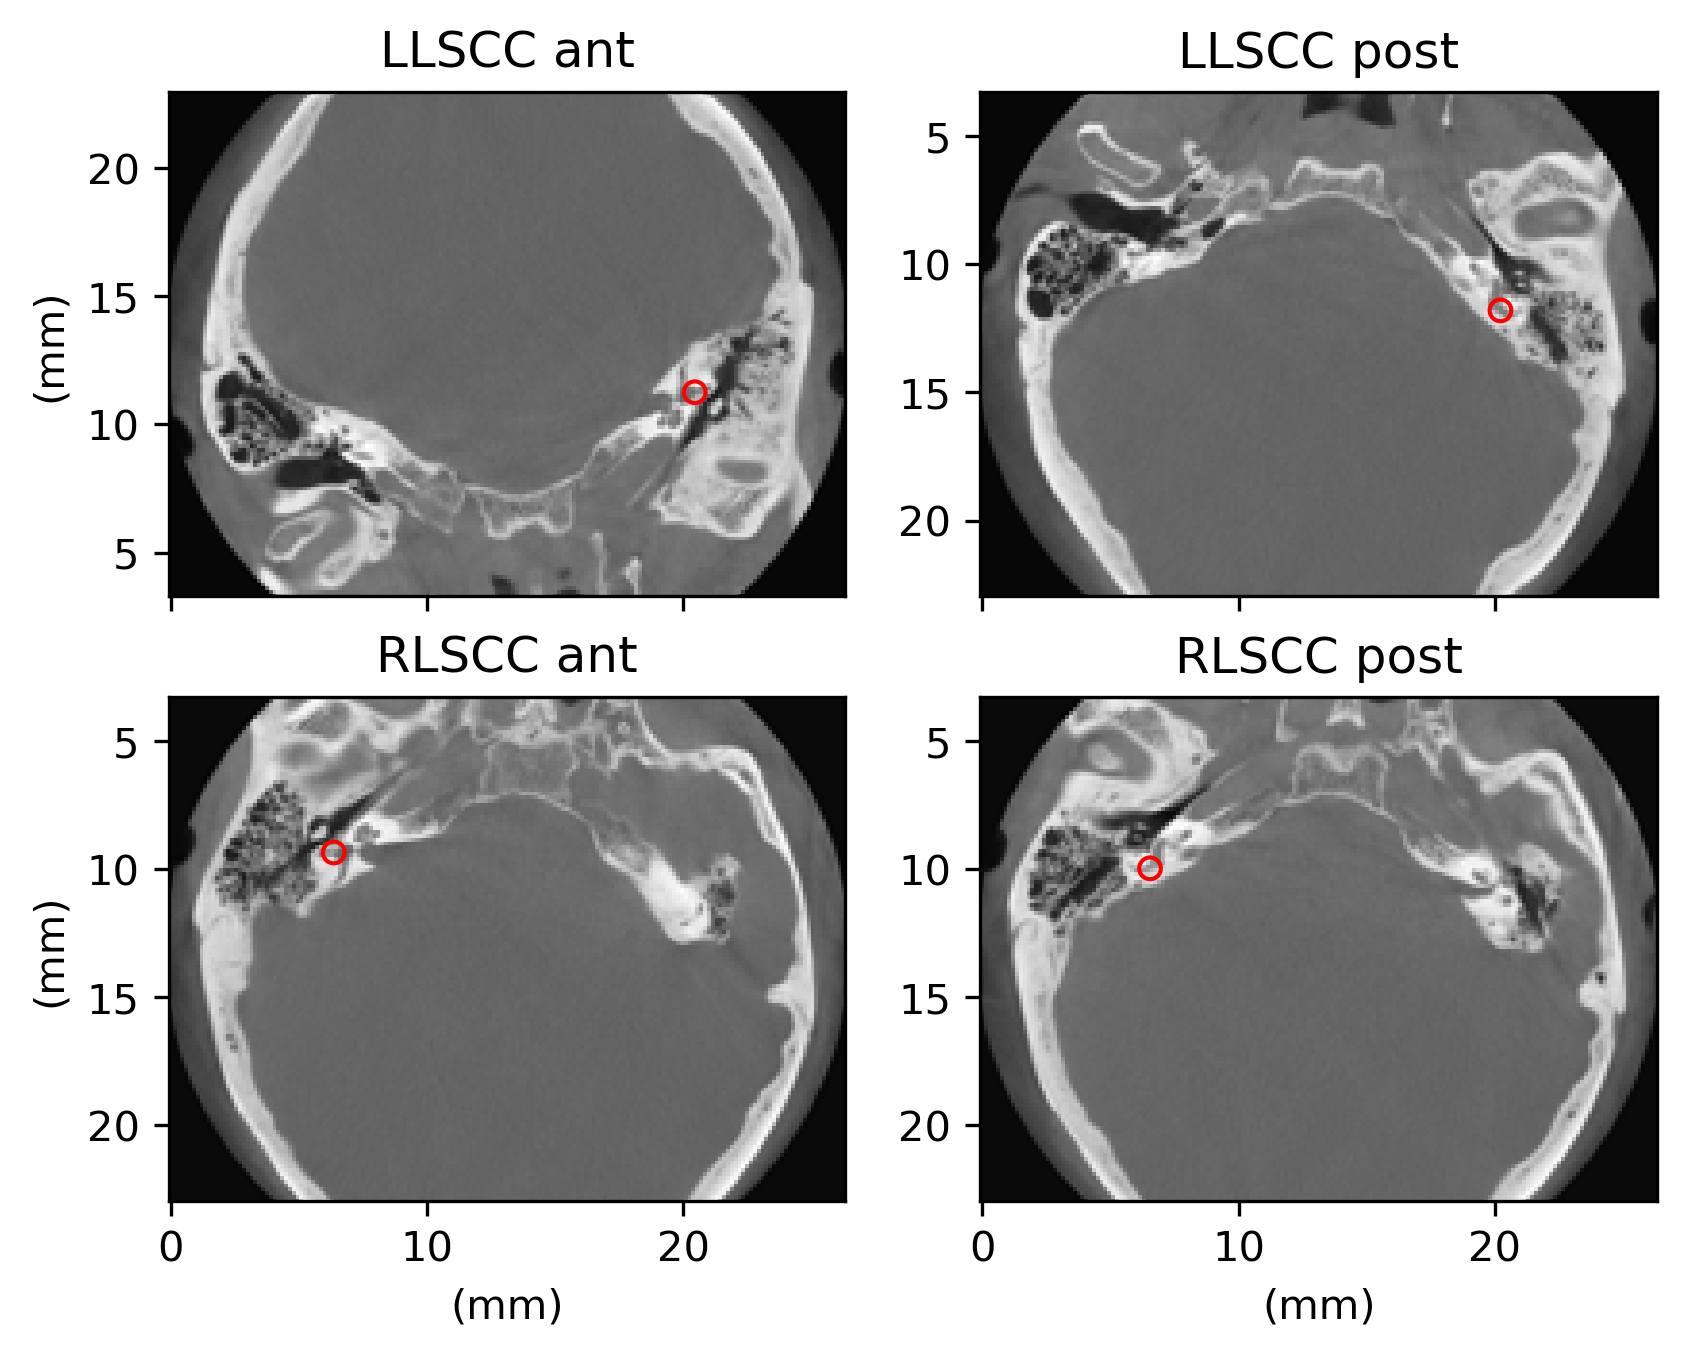

In [16]:
## Check the cropped results
import numpy as np
import importlib
import Functions.MyDataset as MyDataset
import Functions.Visualization as Visualization

pt_volume_path = "/Volumes/Shawn_HDD/PhD/Project/Date/augmentation_from_matlab/Rescaled/176_176_48_PD/DM_17617648_VolPts_1.mat"

pixel_space = [0.15, 0.15, 0.15]

importlib.reload(Visualization)

pat_aug_volume, pat_aug_pts, _ = MyDataset.load_mat_data(pt_volume_path)

Visualization.show_pts(pat_aug_volume, pat_aug_pts, pixel_space)

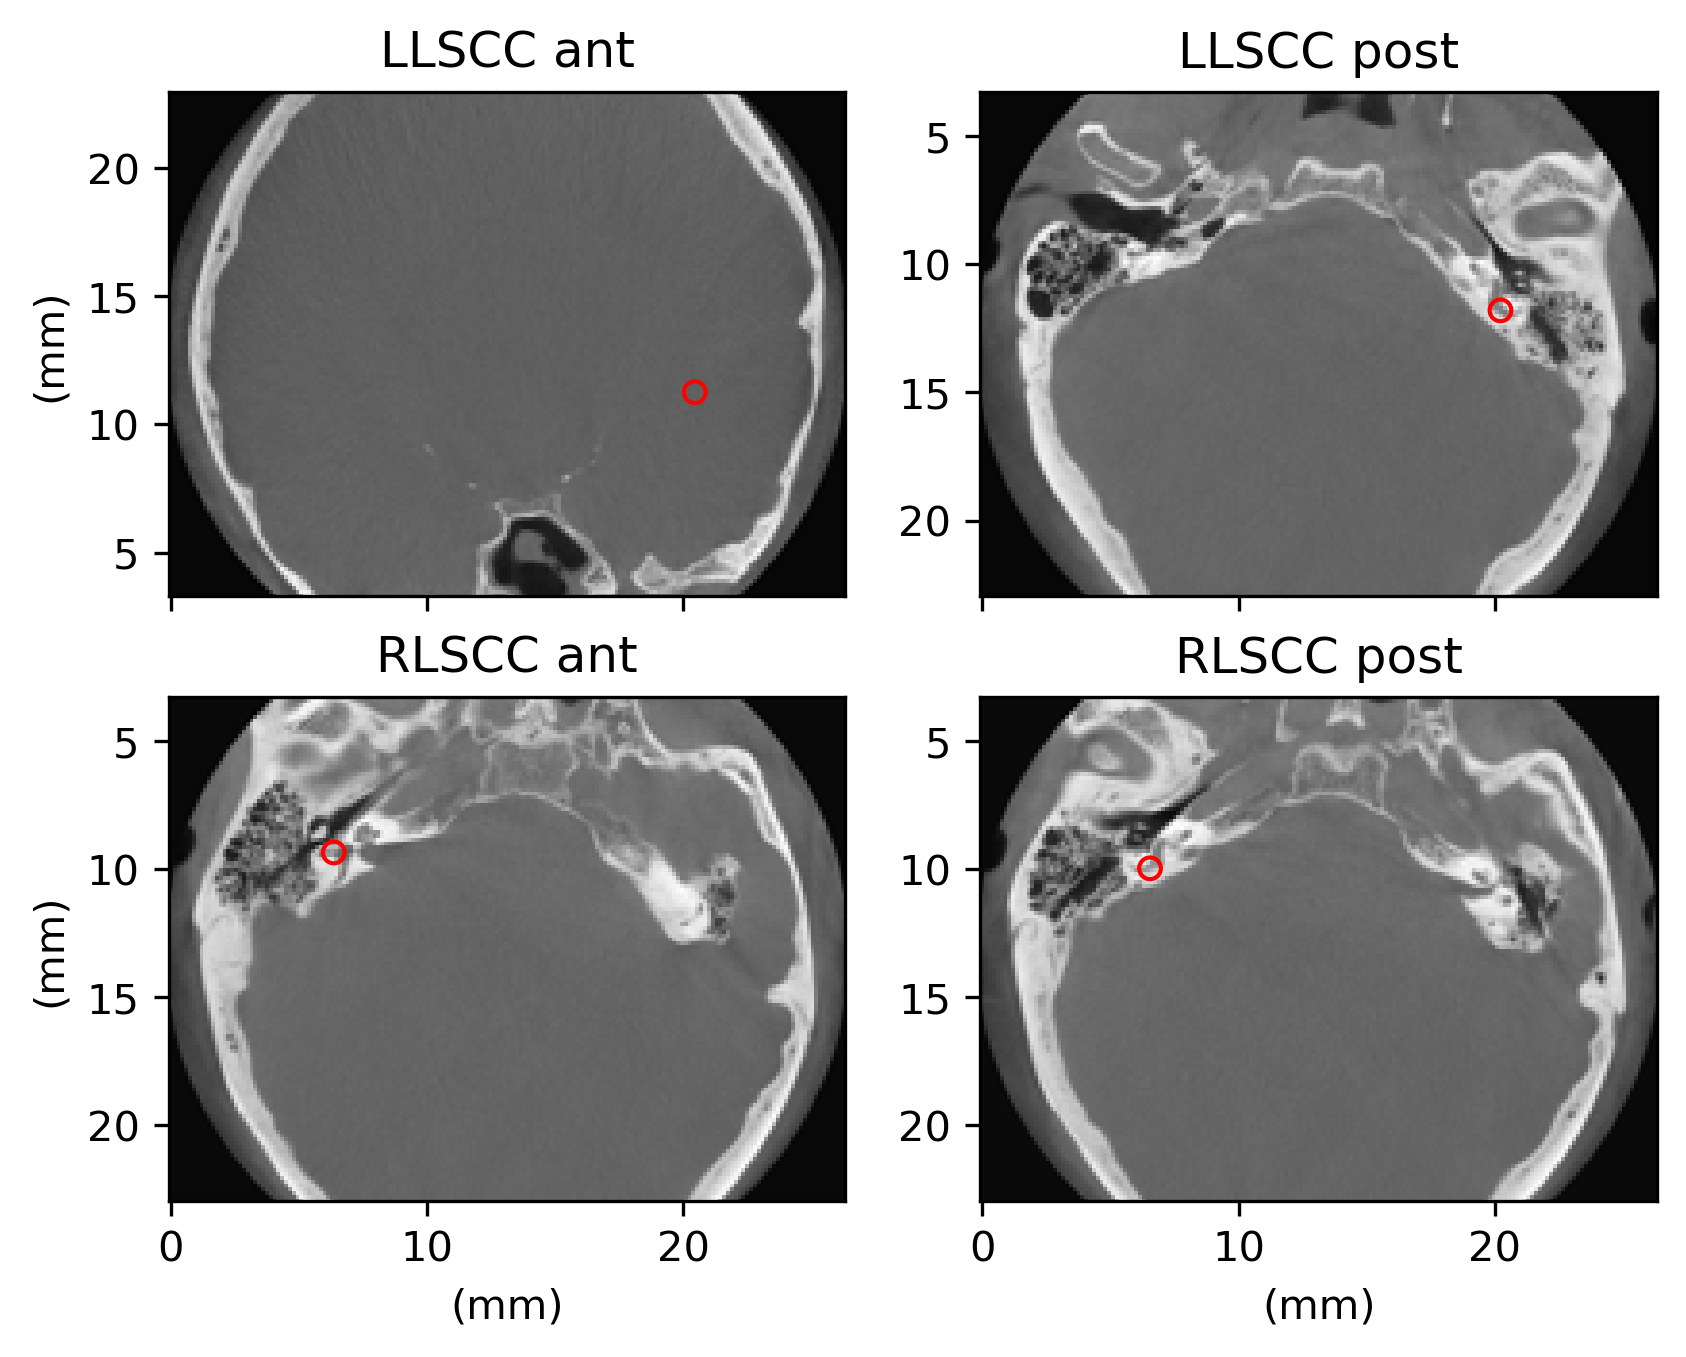

In [10]:
pat_aug_pts[0, 2] = 0

Visualization.show_pts(pat_aug_volume, pat_aug_pts, pixel_space)

In [15]:
import numpy as np

tmp = np.asarray(range(3*3*3)).reshape((3,3,3))

print(tmp[:, :, 0])
print(tmp[1, 0, 0])

[[ 0  3  6]
 [ 9 12 15]
 [18 21 24]]
9


In [ ]:
-print(pat_aug_pts)
trans_pat_aug_pts = np.copy(pat_aug_pts)
trans_pat_aug_pts = trans_pat_aug_pts + 1
Visualization.show_pts(pat_aug_volume, trans_pat_aug_pts, pixel_space)

In [ ]:
import Functions.MyCrop as MyCrop

importlib.reload(MyCrop)

left_volume, left_points, right_volume, right_points, left_points_cut = MyCrop.cut_flip_volume(pat_aug_volume, pat_aug_pts)
flip_right_volume, flip_right_points = MyCrop.flip_volume(right_volume, right_points)

In [ ]:
print("volume shape: ", pat_aug_volume.shape)
print("left volume shape: ", left_volume.shape)
print("right volume shape: ", right_volume.shape)

In [ ]:
left_points_map_back = np.copy(left_points)
left_points_map_back[:, 0] = left_points_map_back[:, 0] + left_points_cut

print("Original Points: ", pat_aug_pts)
print("Locate back: ", np.append(left_points_map_back, right_points, axis=0))

In [ ]:
importlib.reload(Visualization)

pixel_space = [0.15, 0.15, 0.15]

Visualization.show_two_landmarks(left_volume, left_points, flip_right_volume, flip_right_points, pixel_space)

In [ ]:
import numpy as np
import Functions.MyDataset as MyDataset

pixel_space = [0.15, 0.15, 0.15]
size_str = "17617648"
dir_path = "F:/Data/rescaled_data/176_176_48_PD/"
save_volumes_dir = "F:/Data/divided/" + size_str + "/volumes/"
save_points_dir = "F:/Data/divided/" + size_str + "/points/"
save_length_dir = "F:/Data/divided/" + size_str + "/length_res/"
pat_names = MyDataset.get_pat_names()

In [ ]:
from IPython.display import display, clear_output
import importlib
import Functions.Visualization as Visualization

import Functions.MyCrop as MyCrop

importlib.reload(MyCrop)

for pat_name in pat_names:
    clear_output(wait=True)
    for aug_id in range(1, 51):
        # such as: ""
        file_path = dir_path + pat_name + "_" + size_str + "_VolPts_" + str(aug_id) + ".mat"
        print("load file: ", file_path)
        zoomed_aug_volume, zoomed_aug_pts, zoomed_res = MyDataset.load_mat_data(file_path, with_res=True)
        # print("divide volume for: ", file_path)
        left_volume, left_points, right_volume, right_points, left_cut_length = MyCrop.cut_flip_volume(zoomed_aug_volume, zoomed_aug_pts)
        flip_right_volume, flip_right_points = MyCrop.flip_volume(right_volume, right_points)
        # if aug_id%10 == 1:
        #     Visualization.show_two_landmarks(left_volume, left_points, flip_right_volume, flip_right_points, pixel_space)
        # print("save the divided volumes")
        np.save(save_volumes_dir + pat_name + "_" + size_str + f"_volume_divided_left_{aug_id}.npy", left_volume)
        np.save(save_volumes_dir + pat_name + "_" + size_str + f"_volume_divided_right_{aug_id}.npy", flip_right_volume)
        np.save(save_points_dir + pat_name + "_" + size_str + f"_pts_divided_left_{aug_id}.npy", left_points)
        np.save(save_points_dir + pat_name + "_" + size_str + f"_pts_divided_right_{aug_id}.npy", flip_right_points)
        np.save(save_length_dir + pat_name + "_" + size_str + f"_res_{aug_id}.npy", zoomed_res)
        np.save(save_length_dir + pat_name + "_" + size_str + f"_length_divided_left_{aug_id}.npy", left_cut_length)
        #print("Finish dividing: " + file_path)

In [ ]:
# Combine cropped volumes
divided_volumes = []
divided_points = []
divided_length = []
res_array = []

for pat_name in pat_names:
    for aug_id in range(1, 51):
        # such as: ""
        #          ""
        #          ""
        #          ""
        print("**************" + pat_name + "__" + str(aug_id) + "***************")
        divided_volume_left_path = save_volumes_dir + pat_name + "_" + size_str + f"_volume_divided_left_{aug_id}.npy"
        divided_volume_right_path = save_volumes_dir + pat_name + "_" + size_str + f"_volume_divided_right_{aug_id}.npy"
        divided_points_left_path = save_points_dir + pat_name + "_" + size_str + f"_pts_divided_left_{aug_id}.npy"
        divided_points_right_path = save_points_dir + pat_name + "_" + size_str + f"_pts_divided_right_{aug_id}.npy"
        divided_length_left_path = save_length_dir + pat_name + "_" + size_str + f"_length_divided_left_{aug_id}.npy"
        res_path = save_length_dir + pat_name + "_" + size_str + f"_res_{aug_id}.npy"
        divided_volume_left = np.load(divided_volume_left_path)
        divided_volume_right = np.load(divided_volume_right_path)
        divided_points_left = np.load(divided_points_left_path)
        divided_length_left = np.load(divided_length_left_path)
        divided_points_right = np.load(divided_points_right_path)
        res = np.load(res_path)
        divided_volumes.append(divided_volume_left)
        divided_volumes.append(divided_volume_right)
        divided_points.append(divided_points_left)
        divided_points.append(divided_points_right)
        divided_length.append(divided_length_left)
        res_array.append(res)

print(len(divided_volumes))
print(len(divided_points))
print(len(divided_length))
print(len(res_array))

In [ ]:
print(res_array[0])

In [ ]:
divided_volumes = np.asarray(divided_volumes).reshape((2000, 176, 88, 48, 1))
divided_points = np.asarray(divided_points).reshape((2000, 2, 3))
divided_length = np.asarray(divided_length).reshape((1000, 1))
res_array = np.asarray(res_array).reshape((1000, 1, 3))
np.save("F:/Data/divided/divided_volumes_" + size_str + ".npy", divided_volumes)
np.save("F:/Data/divided/divided_points_" + size_str + ".npy", divided_points)
np.save("F:/Data/divided/divided_length_" + size_str + ".npy", divided_length)
np.save("F:/Data/divided/res_array_" + size_str + ".npy", res_array)

## Centre point

## Check the new dataset

In [13]:
# Check dataset and Trained Model results
import Spartan.support_modules as supporter

rescaled_size = (176, 176, 48)
str_size = str(rescaled_size[0]) + "_" + str(rescaled_size[1]) + "_" + str(rescaled_size[2])
dataset_dir = "/Volumes/Shawn_HDD/PhD/Project/Date/augmentation_from_matlab/divided/"

X_train, Y_train, res_train, length_train, X_val, Y_val, res_val, length_val, X_test, Y_test, res_test, length_test = \
    supporter.load_dataset_divide(dataset_dir, rescaled_size, pat_splits=MyDataset.get_pat_splits(static=True))

In [3]:
size_str = f"{rescaled_size[0]}{rescaled_size[1]}{rescaled_size[2]}"

x_dataset_path = dataset_dir + "divided_volumes_" + size_str + ".npy"
y_dataset_path = dataset_dir + "divided_points_" + size_str + ".npy"
length_dataset_path = dataset_dir + "divided_length_" + size_str + ".npy"
res_dataset_path = dataset_dir + "res_array_" + size_str + ".npy"

x_dataset = np.load(x_dataset_path)
y_dataset = np.load(y_dataset_path).astype('float32')
length_dataset = np.load(length_dataset_path).astype('float32')
res_dataset = np.load(res_dataset_path).astype('float32')

In [131]:
print(length_dataset[0:10])

In [125]:
y_dataset = np.load(y_dataset_path).astype('float32')

# y_dataset[list(range(1,2000,2)), :, [0]] = y_dataset[list(range(1,2000,2)), :, [0]] + 2
#
# np.save(y_dataset_path, y_dataset)

In [7]:
import Functions.MyDataset as MyDataset

check_idx = MyDataset.get_idx_from_pat('DM', 1, split=True)
print(check_idx)

left_points = np.copy(y_dataset[check_idx, :, :])
right_points = np.copy(y_dataset[check_idx+1, :, :])

In [11]:
import Functions.Visualization as Visualization

importlib.reload(Visualization)

pixel_space = [0.15, 0.15, 0.15]
# check_idx = 11
print(left_points)
print(right_points)

Visualization.show_two_landmarks(x_dataset[check_idx, :, :, :, 0], left_points, x_dataset[check_idx+1, :, :, :, 0], right_points, pixel_space)

print(left_points)
print(right_points)

## Review new augmentation data

In [ ]:
import h5py
import numpy as np
import Functions.Visualization as Visualization

pt_name = "AH"
aug_id = 4

base_dir = "F:/Data/augmentation_exp/reduce_size/176x88x48"
file_path = f"{base_dir}/{pt_name}_176x88x48_{aug_id}.mat"

file = h5py.File(file_path, 'r')

left_volume = file.get('augLeftVolRescaled')
left_pts = file.get('augLeftPtsRescaled')
left_res = file.get('leftRes')
left_volsize = file.get('augLeftVolSize')

right_volume = file.get('augRightVolRescaled')
right_pts = file.get('augRightPtsRescaled')
right_res = file.get('rightRes')
right_volsize = file.get('augRightVolSize')

left_volume = np.array(left_volume).T
left_pts = np.array(left_pts).reshape(3, 2).T
left_vol_res = np.array(left_res).T
left_vol_size = np.array(left_volsize).T

right_volume = np.array(right_volume).T
right_pts = np.array(right_pts).reshape(3, 2).T
right_vol_res = np.array(right_res).T
right_vol_size = np.array(right_volsize).T

pixel_space = [0.15, 0.15, 0.15]

Visualization.show_two_landmarks(left_volume, left_pts, right_volume, right_pts, pixel_space)


In [ ]:
# Combine cropped volumes
divided_volumes = []
divided_points = []
res_array = []

base_dir = "F:/Data/augmentation_exp/reduce_size/176x88x48"

for pat_name in pat_names:
    for aug_id in range(1, 51):
        print("**************" + pat_name + "__" + str(aug_id) + "***************")

        file_path = f"{base_dir}/{pat_name}_176x88x48_{aug_id}.mat"
        file = h5py.File(file_path, 'r')

        # load Left
        left_volume = file.get('augLeftVolRescaled')
        left_pts = file.get('augLeftPtsRescaled')
        left_res = file.get('leftRes')
        # load Right
        right_volume = file.get('augRightVolRescaled')
        right_pts = file.get('augRightPtsRescaled')
        right_res = file.get('rightRes')

        left_volume = np.array(left_volume).T
        left_pts = np.array(left_pts).reshape(3, 2).T
        left_vol_res = np.array(left_res).T

        right_volume = np.array(right_volume).T
        right_pts = np.array(right_pts).reshape(3, 2).T
        right_vol_res = np.array(right_res).T

        divided_volumes.append(left_volume)
        divided_volumes.append(right_volume)
        divided_points.append(left_pts)
        divided_points.append(right_pts)
        res_array.append(left_res) # left_res and right_res are the same

print(len(divided_volumes))
print(len(divided_points))
print(len(res_array))

print(res_array[0])

In [ ]:
size_str = 17617648
save_dir = "F:/Data/augmentation_exp/reduce_size"

divided_volumes = np.asarray(divided_volumes).reshape((2000, 176, 88, 48, 1))
divided_points = np.asarray(divided_points).reshape((2000, 2, 3))
divided_length = np.asarray(divided_length).reshape((1000, 1))
res_array = np.asarray(res_array).reshape((1000, 1, 3))
np.save(f"{save_dir}/divided_volumes_{size_str}.npy", divided_volumes)
np.save(f"{save_dir}/divided_points_{size_str}.npy", divided_points)
np.save(f"{save_dir}/divided_res_{size_str}.npy", res_array)